In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/website-data/data-export.csv


In [14]:
import pandas as pd
data=pd.read_csv('/kaggle/input/website-data/data-export.csv')
data.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [15]:
new_header = data.iloc[0]  
data = data[1:]  
data.columns = new_header  
data.reset_index(drop=True, inplace=True)
print(data.head())


0 Session primary channel group (Default channel group)  \
0                                             Direct      
1                                     Organic Social      
2                                             Direct      
3                                     Organic Social      
4                                     Organic Social      

0 Date + hour (YYYYMMDDHH) Users Sessions Engaged sessions  \
0               2024041623   237      300              144   
1               2024041719   208      267              132   
2               2024041723   188      233              115   
3               2024041718   187      256              125   
4               2024041720   175      221              112   

0 Average engagement time per session Engaged sessions per user  \
0                  47.526666666666700        0.6075949367088610   
1                   32.09737827715360        0.6346153846153850   
2                   39.93991416309010        0.6117021276595740   
3   

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [17]:
print(data.describe())

0      Session primary channel group (Default channel group)  \
count                                                3182      
unique                                                  7      
top                                                Direct      
freq                                                  672      

0      Date + hour (YYYYMMDDHH) Users Sessions Engaged sessions  \
count                      3182  3182     3182             3182   
unique                      672   147      180              103   
top                  2024042417     1        1                0   
freq                          6   335      340              393   

0      Average engagement time per session Engaged sessions per user  \
count                                 3182                      3182   
unique                                2823                       808   
top                                      0                         0   
freq                                   170             

In [18]:
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])

# group data by date and sum up the users and sessions
grouped_data = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({'Users': 'sum', 'Sessions': 'sum'})

In [20]:
grouped_data

,Users,Sessions
Date + hour (YYYYMMDDHH),,
2024-04-06 00:00:00,197,270
2024-04-06 01:00:00,107,142
2024-04-06 02:00:00,115,142
2024-04-06 03:00:00,93,122
2024-04-06 04:00:00,79,102
...,...,...
2024-05-03 19:00:00,264,324
2024-05-03 20:00:00,273,327
2024-05-03 21:00:00,315,374


## **The Total Users and Sessions over time**

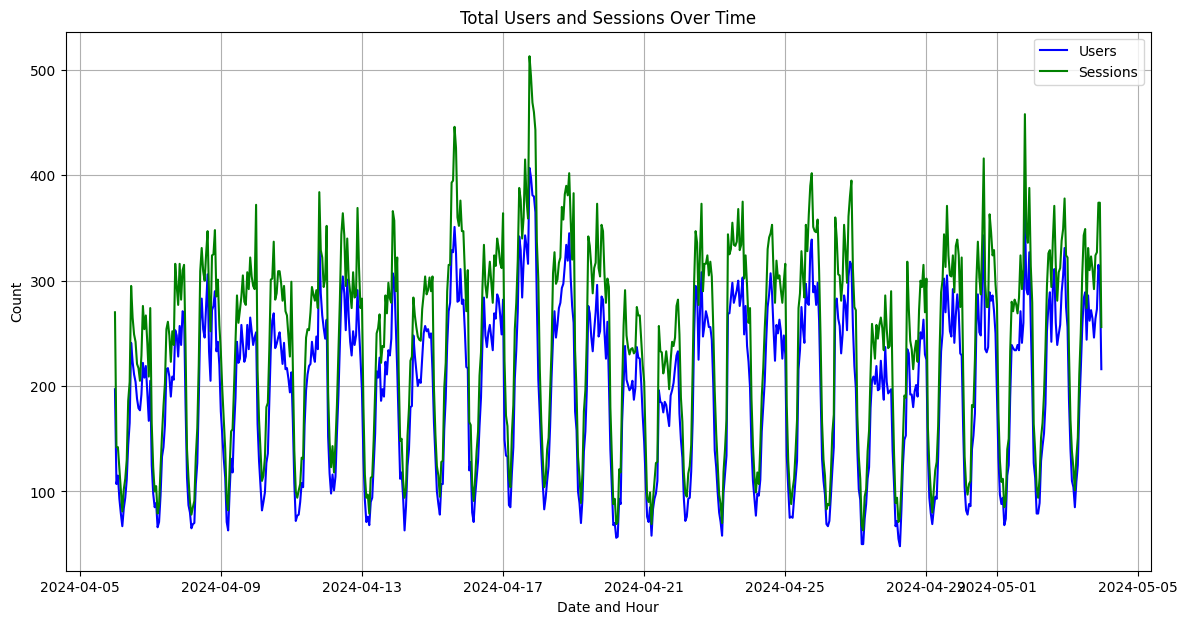

In [19]:
import matplotlib.pyplot as plt

# plotting the aggregated users and sessions over time
plt.figure(figsize=(14, 7))
plt.plot(grouped_data.index, grouped_data['Users'], label='Users', color='blue')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions', color='green')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

## **Engagement Analysis**

In [21]:
# convert relevant columns to numeric for engagement analysis
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])

In [22]:
# group data by date and calculate mean for engagement metrics
engagement_metrics = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})


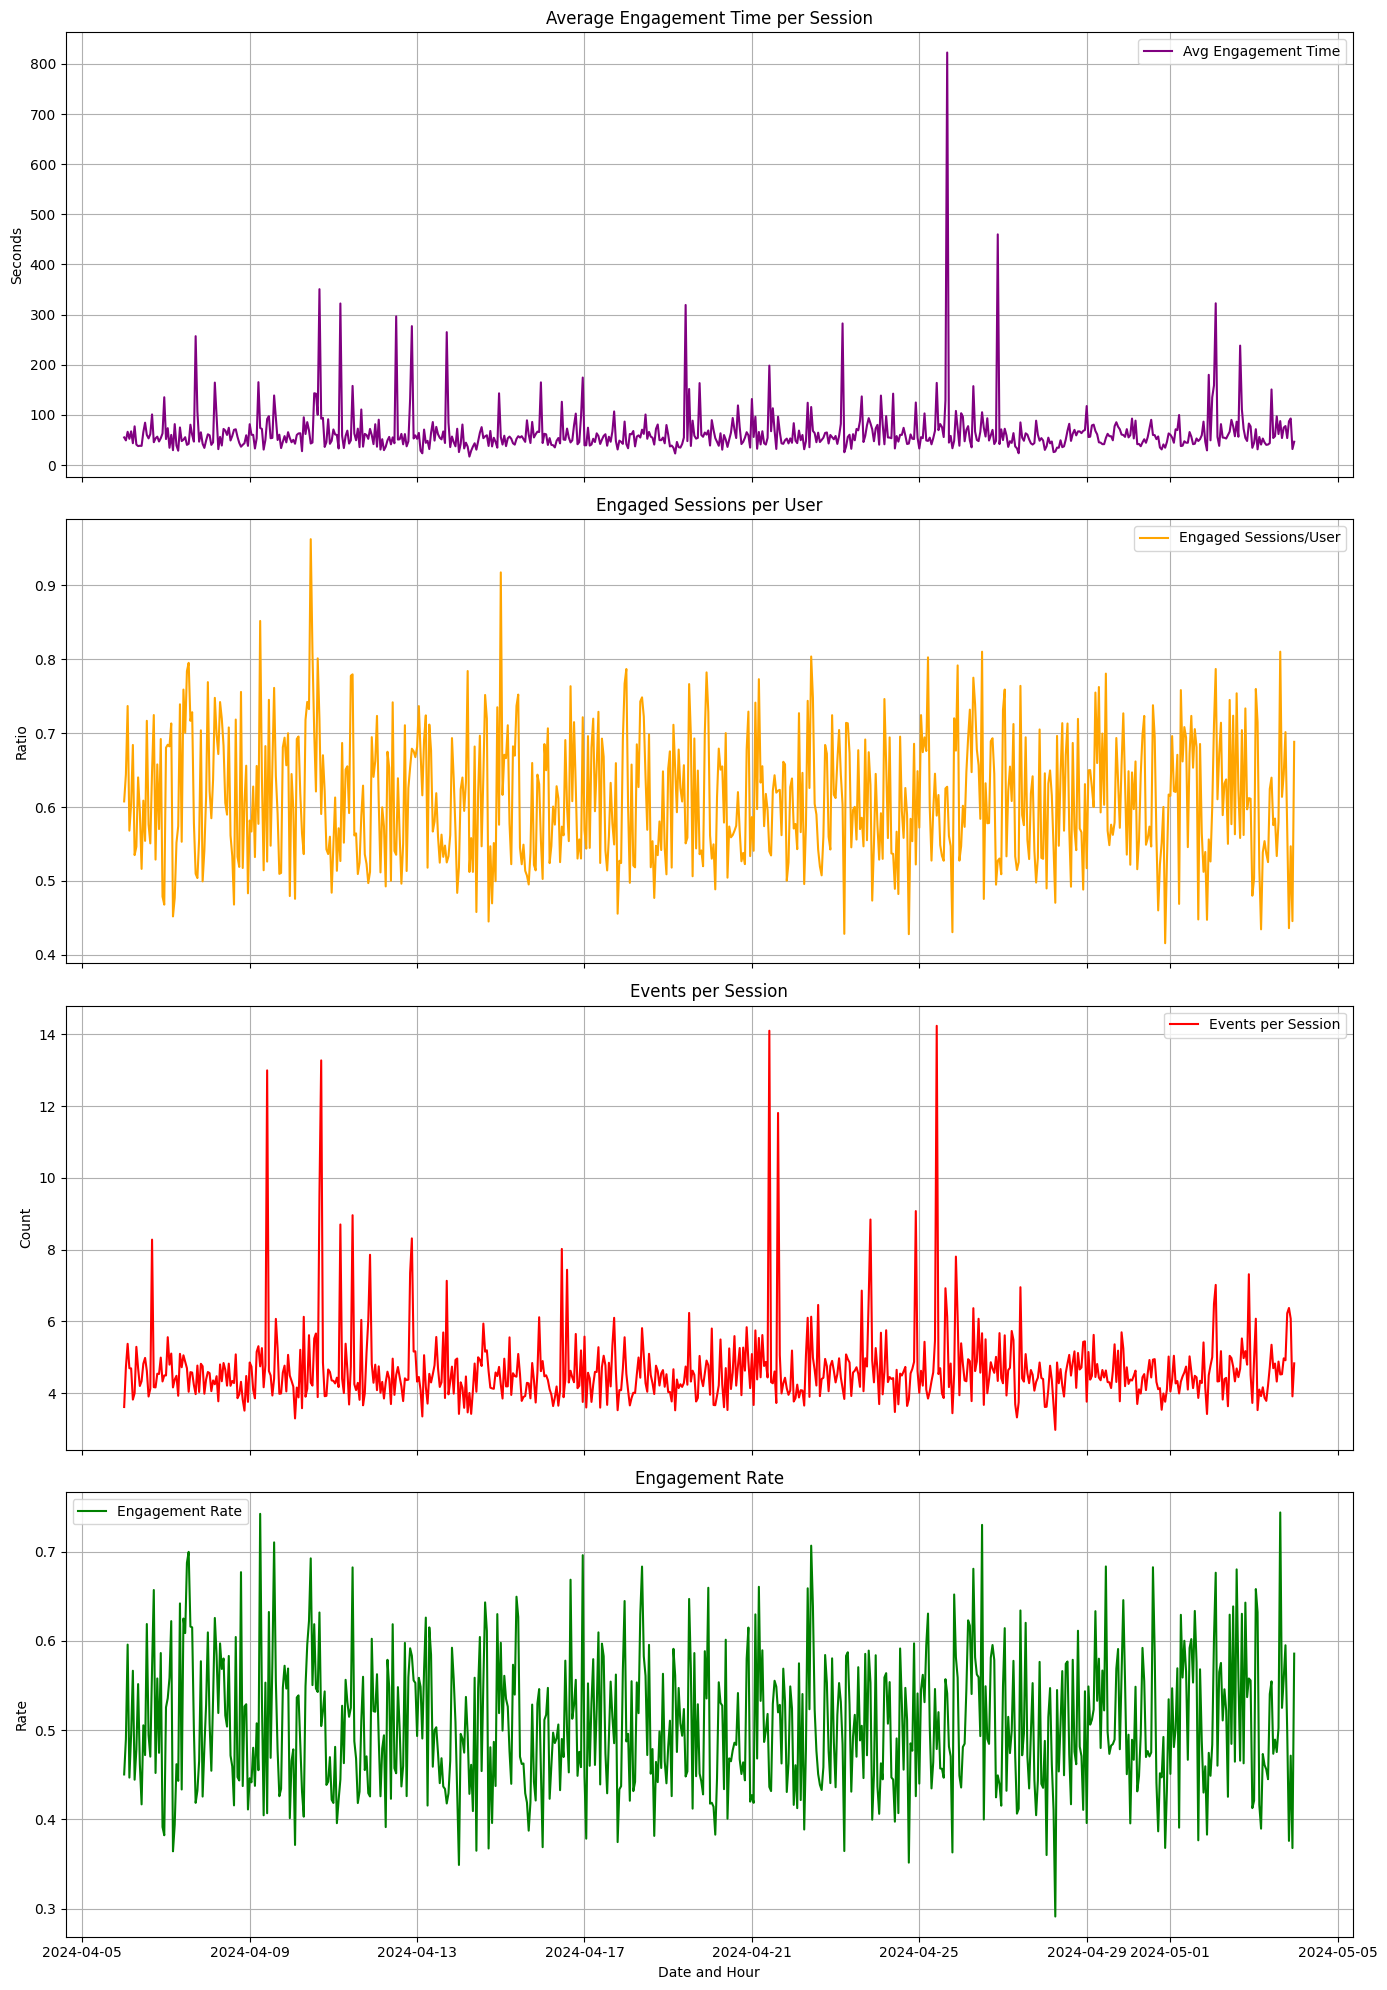

In [23]:
# plotting engagement metrics
fig, ax = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], label='Avg Engagement Time', color='purple')
ax[0].set_title('Average Engagement Time per Session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], label='Engaged Sessions/User', color='orange')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], label='Events per Session', color='red')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], label='Engagement Rate', color='green')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

**Average Engagement Time per Session: The time spent per session shows fluctuations over the observed period. There are noticeable peaks, suggesting times when users were particularly engaged, potentially due to specific content releases or events**

**Engaged Sessions per User: This ratio fluctuates slightly but generally indicates that a good portion of sessions per user are engaged. Peaks in this metric could correspond to times when users find the content more relevant or engaging.**

**Events per Session: The count of events per session remains relatively consistent but does show some variation. Peaks here could indicate more interactive content or features being used by visitors.**

**Engagement Rate: The engagement rate over time shows how many sessions are considered engaged out of the total. There are some ups and downs which may relate to how different content resonates with users or how effective certain user acquisition channels are.**

## **Correlation Between Different User Metrics**

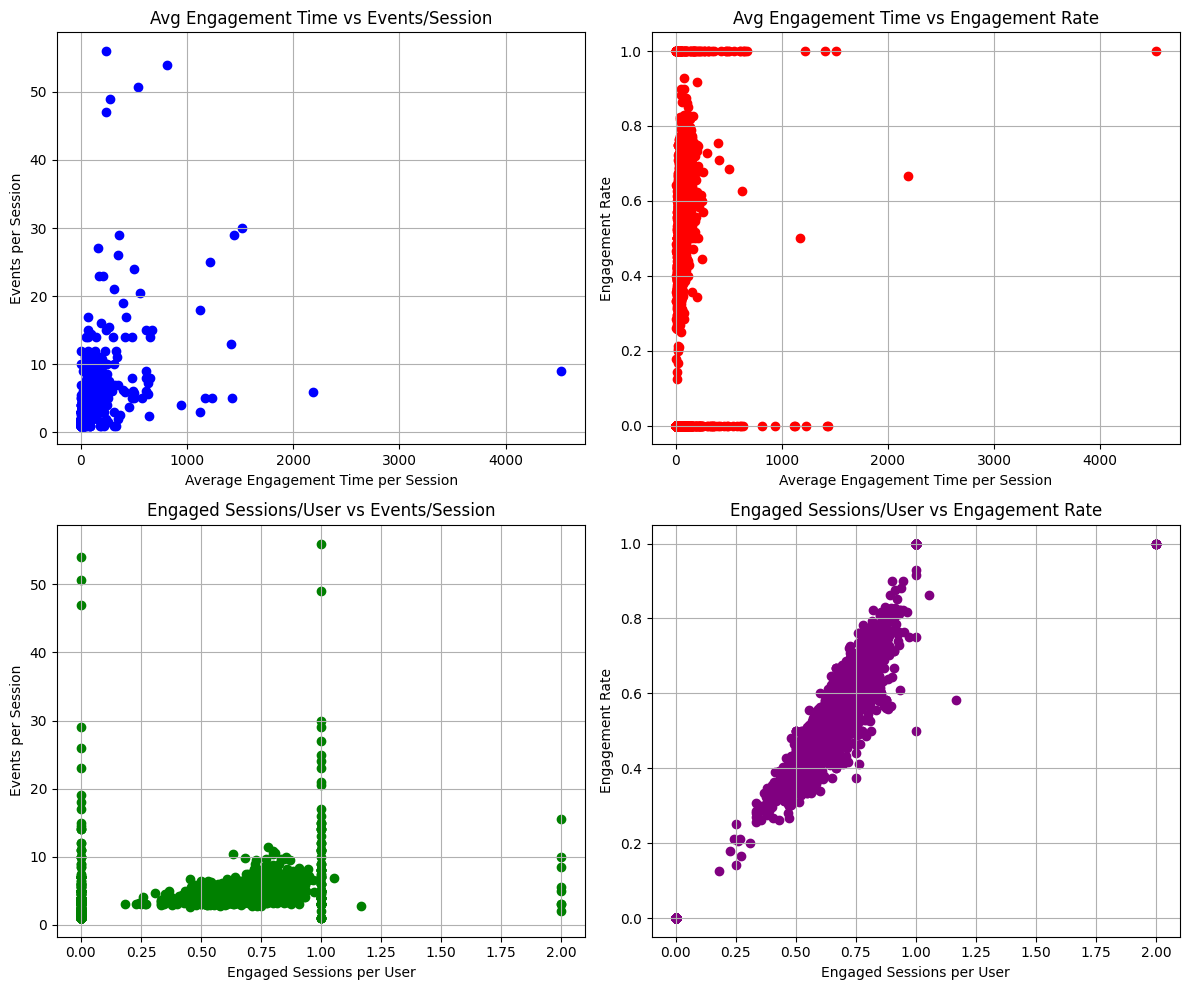

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(data['Average engagement time per session'], data['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)  # enable grid

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(data['Average engagement time per session'], data['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

**Average Engagement Time vs Events per Session: There appears to be a concentration of data points at lower average engagement times with a wide range of events per session. As the average engagement time increases, the number of events per session tends to cluster more narrowly around lower values**

**Average Engagement Time vs Engagement Rate: There is a clear trend where sessions with very low engagement times have a broad range of engagement rates, but as engagement time increases, the engagement rate converges towards higher values.**

**Engaged Sessions per User vs Events per Session: Most data points cluster at lower values for both metrics, with few users having a high number of engaged sessions or events per session.**

**Engaged Sessions per User vs Engagement Rate: There is a strong positive correlation between engaged sessions per user and engagement rate, especially noticeable at higher values of engaged sessions per user.**

## **Channel Performance Analysis**

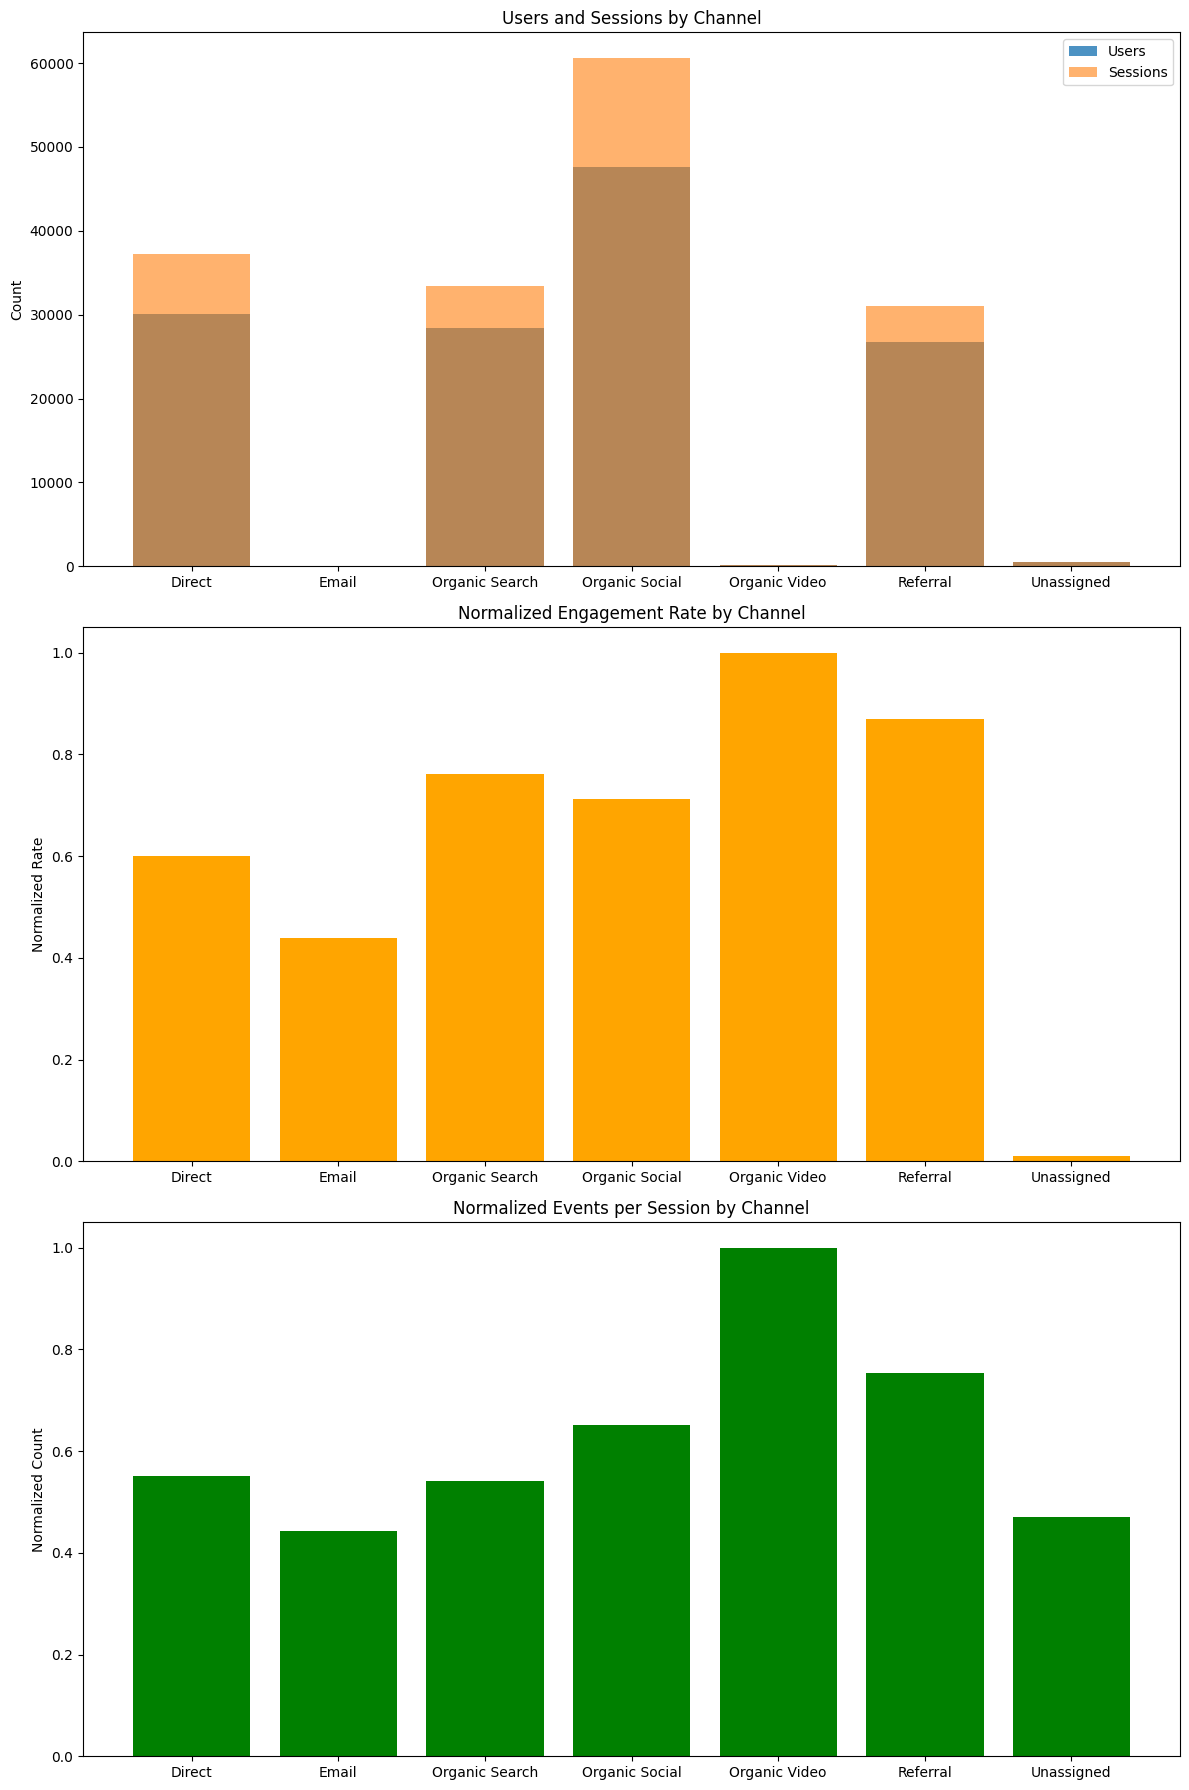

In [25]:
# group data by channel and aggregate necessary metrics
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

## **Time Based Analysis**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')

# Extracting hour, day, and month
data['Hour'] = data['Date + hour (YYYYMMDDHH)'].dt.hour
data['Day'] = data['Date + hour (YYYYMMDDHH)'].dt.date
data['Month'] = data['Date + hour (YYYYMMDDHH)'].dt.to_period('M')

## **Hourly Trends**

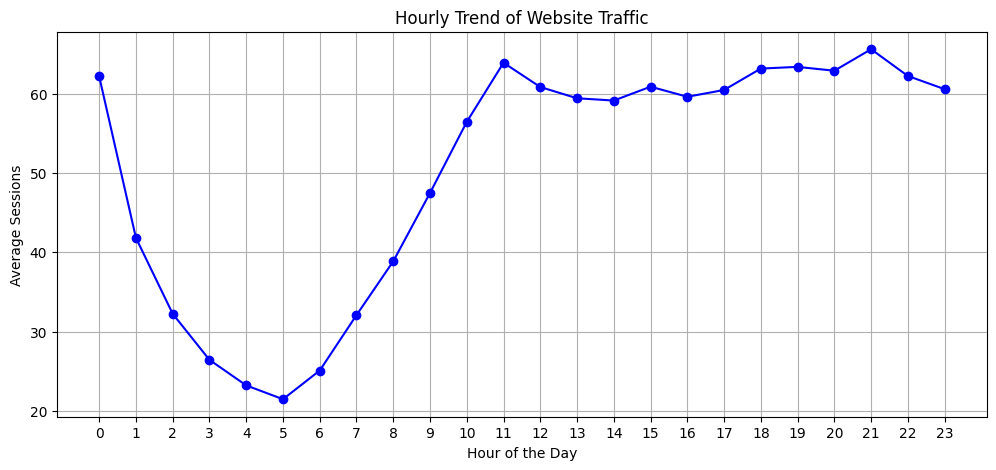

In [35]:
hourly_sessions = data.groupby('Hour')['Sessions'].mean()

plt.figure(figsize=(12, 5))
plt.plot(hourly_sessions.index, hourly_sessions.values, marker='o', color='b')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Sessions')
plt.title('Hourly Trend of Website Traffic')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


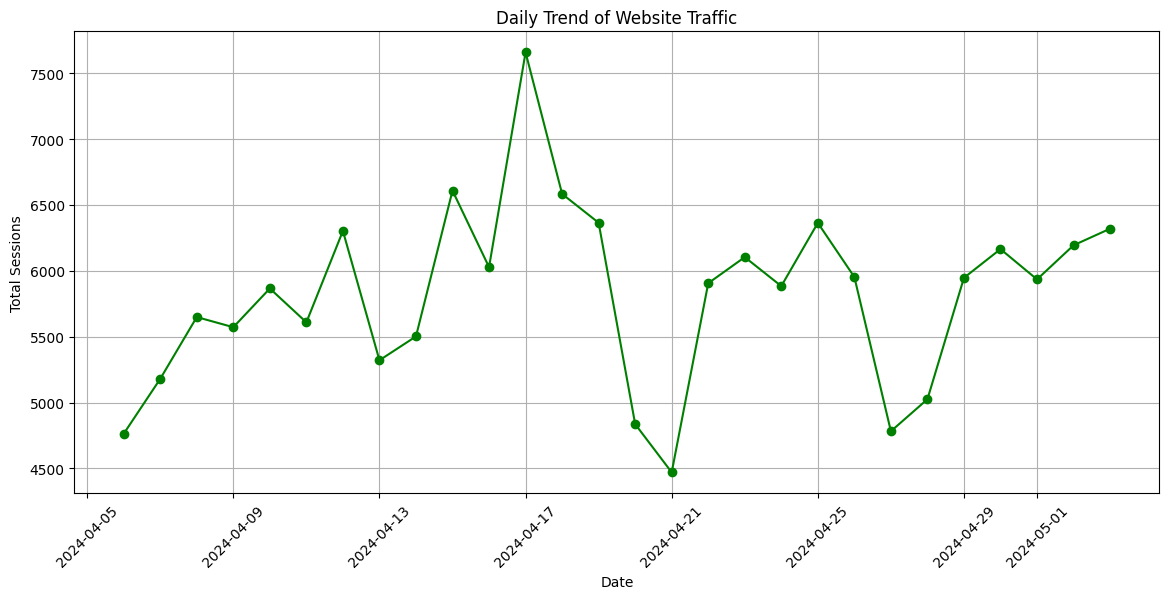

In [36]:
daily_sessions = data.groupby('Day')['Sessions'].sum()

plt.figure(figsize=(14, 6))
plt.plot(daily_sessions.index, daily_sessions.values, marker='o', linestyle='-', color='g')
plt.xlabel('Date')
plt.ylabel('Total Sessions')
plt.title('Daily Trend of Website Traffic')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

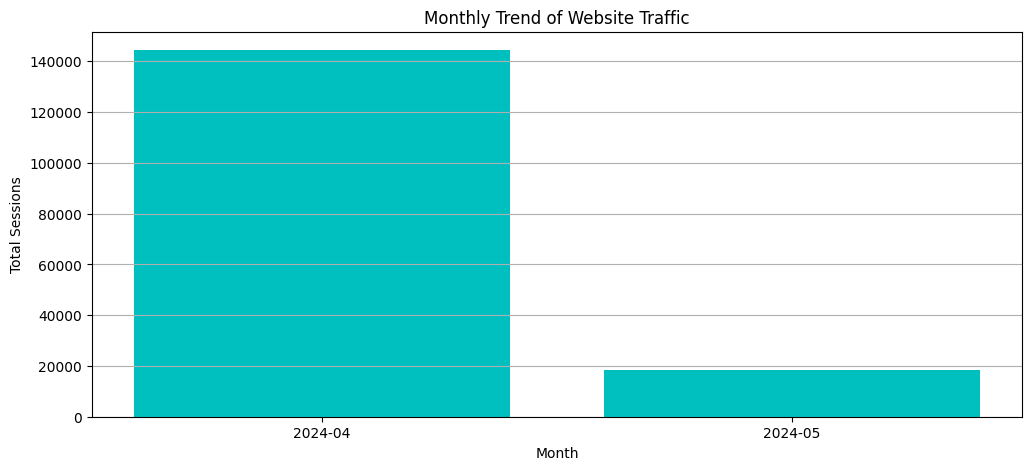

In [37]:
monthly_sessions = data.groupby('Month')['Sessions'].sum()

plt.figure(figsize=(12, 5))
plt.bar(monthly_sessions.index.astype(str), monthly_sessions.values, color='c')
plt.xlabel('Month')
plt.ylabel('Total Sessions')
plt.title('Monthly Trend of Website Traffic')
plt.grid(axis='y')
plt.show()


## **Forecasting Website Traffic**

<ipython-input-26-aac28beb0f1a>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
<ipython-input-26-aac28beb0f1a>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')


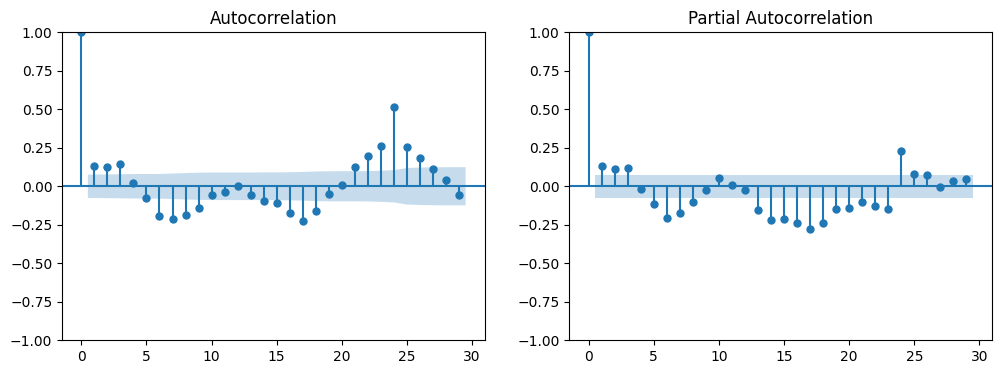

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24

differenced_series = time_series_data.diff().dropna()

# plot ACF and PACF of time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

**PACF (Partial Autocorrelation Function): This plot helps determine the p parameter for the AR part of the model. You look for the lag after which most partial autocorrelations are not significantly different from zero. In our plot, the PACF shows a significant spike at lag 1 and then cuts off, suggesting an AR part of order 1. Therefore, p=1.**

**ACF (Autocorrelation Function): This plot helps identify the q parameter for the MA part of the model. You look for the lag after which most autocorrelations are not significantly different from zero. The ACF plot in our case tails off gradually, but considering the first significant spike is essential. Since the spike at lag 1 is significant and there’s a gradual tailing off rather than a sharp cut-off, it suggests a potential MA component. However, the tailing-off nature complicates the exact determination of q, but a starting point of q=1 could be considered.**

## **ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA MAE: 83.21


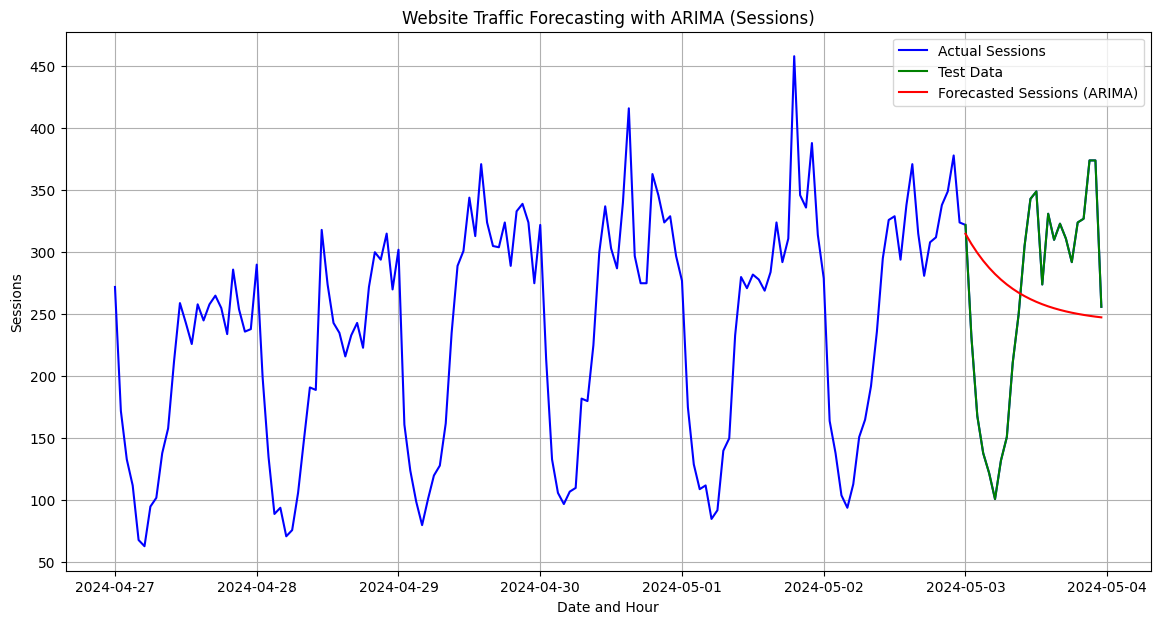

In [29]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import numpy as np

# Train-test split
train, test = time_series_data.iloc[:train_size], time_series_data.iloc[train_size:]

# Fit ARIMA model
arima_model = ARIMA(train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Forecast for the test period
arima_forecast = arima_model_fit.forecast(steps=24)

# Calculate MAE
arima_mae = mean_absolute_error(test, arima_forecast)
print(f"ARIMA MAE: {arima_mae:.2f}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Actual Sessions', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(test.index, arima_forecast, label='Forecasted Sessions (ARIMA)', color='red')
plt.title('Website Traffic Forecasting with ARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()


## **SARIMA**

<ipython-input-30-1d5f2533f38d>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
<ipython-input-30-1d5f2533f38d>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')


SARIMA MAE: 20.12


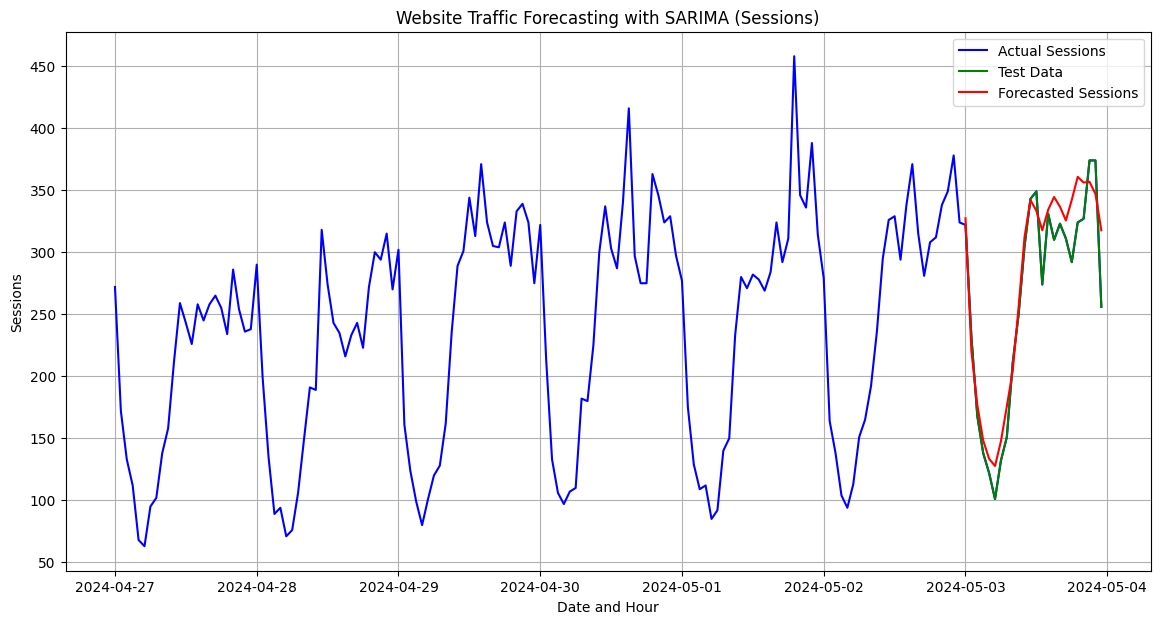

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Convert to time series format
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')

# Define the train-test split (e.g., last 24 hours as test)
train_size = len(time_series_data) - 24
train, test = time_series_data.iloc[:train_size], time_series_data.iloc[train_size:]

# Fit SARIMA model on training data
seasonal_period = 24
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# Forecast for the test period
sarima_forecast = sarima_model_fit.forecast(steps=24)
sarima_mae = mean_absolute_error(test, sarima_forecast)
print(f"SARIMA MAE: {sarima_mae:.2f}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Actual Sessions', color='blue')  # Last week of actual data
plt.plot(test.index, test, label='Test Data', color='green')  # Test Data
plt.plot(test.index, sarima_forecast, label='Forecasted Sessions', color='red')  # SARIMA Forecast
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()


## **Prophet**

13:33:18 - cmdstanpy - INFO - Chain [1] start processing
13:33:18 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Prophet MAE: 21.49


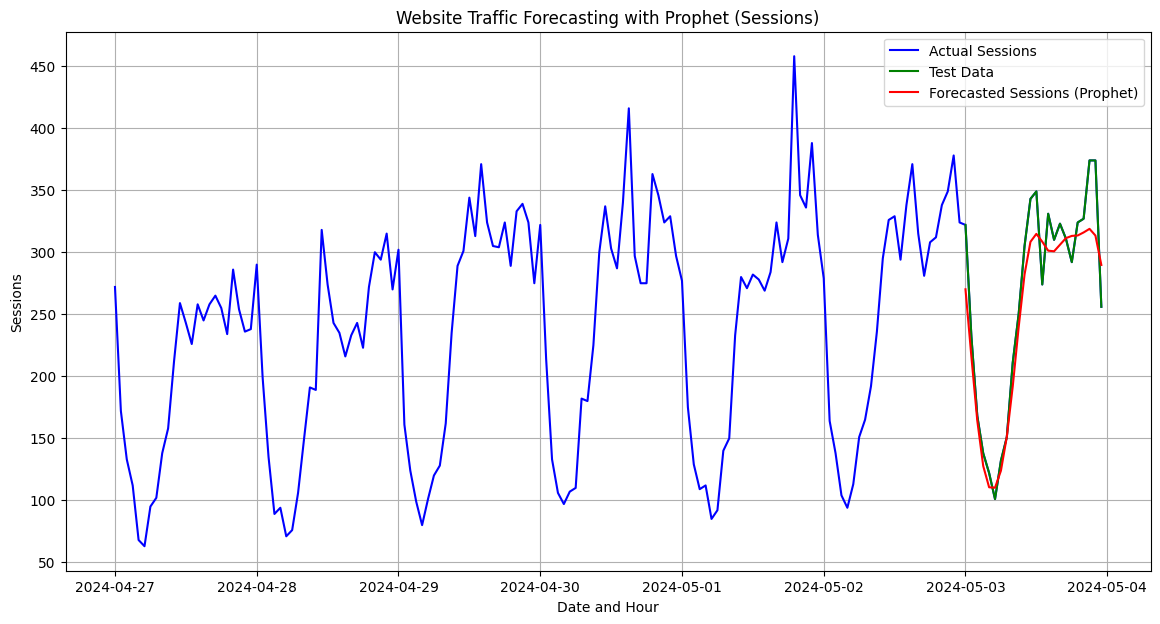

In [31]:
from prophet import Prophet

# Prepare data for Prophet
df_prophet = time_series_data.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet requires 'ds' (datetime) and 'y' (values)

# Train-test split
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

# Initialize and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Create future dataframe for prediction (next 24 hours)
future = prophet_model.make_future_dataframe(periods=24, freq='H')
prophet_forecast = prophet_model.predict(future)

# Extract only the forecasted part
forecasted_values = prophet_forecast[['ds', 'yhat']].set_index('ds').iloc[-24:]

# Calculate MAE
prophet_mae = mean_absolute_error(test_prophet['y'], forecasted_values['yhat'])
print(f"Prophet MAE: {prophet_mae:.2f}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df_prophet['ds'][-168:], df_prophet['y'][-168:], label='Actual Sessions', color='blue')
plt.plot(test_prophet['ds'], test_prophet['y'], label='Test Data', color='green')
plt.plot(forecasted_values.index, forecasted_values['yhat'], label='Forecasted Sessions (Prophet)', color='red')
plt.title('Website Traffic Forecasting with Prophet (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()
